<a href="https://colab.research.google.com/github/ggrgrtr/Machine-learning-sine-and-complex-function/blob/main/SineColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

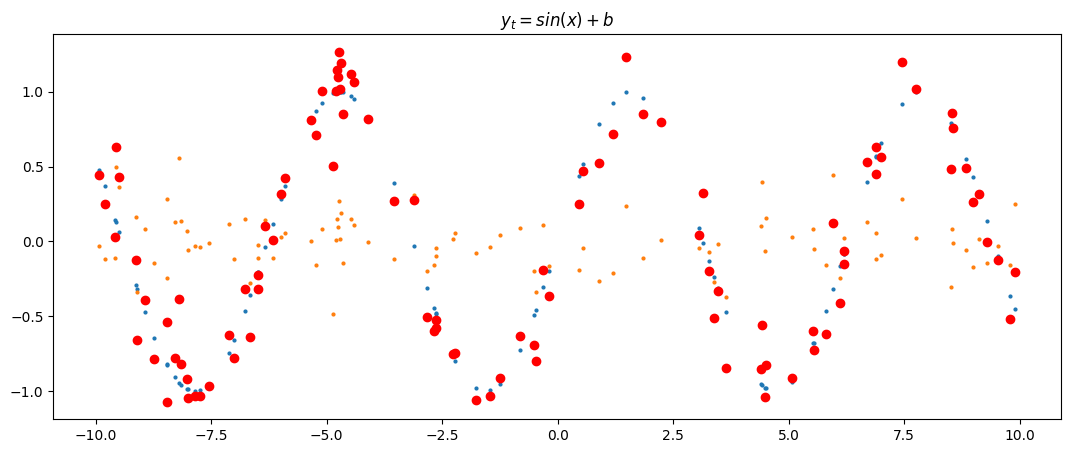

In [ ]:
import torch as q
import matplotlib
import matplotlib.pyplot as plt

dev =q.device('cuda:0') # ----------?

matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# -------------------  ТРЕНЕРОВОЧНЫЙ ТЕНЗОР X -> Y  -------------------

x_train = q.rand(100)  # БЕРЕМ СЛУЧАЙНЫЕ Х ДЛЯ ТРЕНЕРОВОЧНЫХ ДАННЫХ
x_train = x_train * 20. - 10.  # ЦЕНТРУЕМ, ЧТОБЫ ЛУЧШЕ ВЫГЛЯДЕЛО В PYPLOT

#x_train=x_train.to(dev)
y_train = q.sin(x_train)  # ПОЛУЧАЕМ Y ИЗ Х

plt.title('$y_t = sin(x) + b$')
plt.plot(x_train.numpy(), y_train.numpy(), 'o', markersize=2, label='true value')

noise = q.randn(y_train.shape) / 5.
plt.plot(x_train.numpy(), noise.numpy(), 'o', markersize=2, label='noise')
# plt.axis([-10,10,-1,1])

y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o', c='red', label='value with noise')

x_train.unsqueeze_(1)  # ДЕЛАЕТ ИЗ ТЕНЗОРА ТЕНЗОР ВЕКТОРОВ (С ОДНИМ ЧИСЛОМ)
y_train.unsqueeze_(1)

plt.show()

In [ ]:
x_validation = q.linspace(-10, 10, 100)
y_validation = q.sin(x_validation)

#x_validation=x_validation.to(dev)

# plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
# plt.title('$math_sin(x)$')
# plt.xlabel('x_validation')
# plt.show()

x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[ 0.5440],
        [ 0.3646],
        [ 0.1703],
        [-0.0308],
        [-0.2308],
        [-0.4213],
        [-0.5947],
        [-0.7439],
        [-0.8629],
        [-0.9467],
        [-0.9921],
        [-0.9971],
        [-0.9615],
        [-0.8869],
        [-0.7761],
        [-0.6338],
        [-0.4658],
        [-0.2787],
        [-0.0804],
        [ 0.1213],
        [ 0.3180],
        [ 0.5017],
        [ 0.6651],
        [ 0.8014],
        [ 0.9051],
        [ 0.9720],
        [ 0.9994],
        [ 0.9861],
        [ 0.9327],
        [ 0.8414],
        [ 0.7158],
        [ 0.5612],
        [ 0.3837],
        [ 0.1906],
        [-0.0103],
        [-0.2107],
        [-0.4026],
        [-0.5781],
        [-0.7300],
        [-0.8523],
        [-0.9399],
        [-0.9893],
        [-0.9985],
        [-0.9670],
        [-0.8962],
        [-0.7889],
        [-0.6496],
        [-0.4839],
        [-0.2984],
        [-0.1008],
        [ 0.1008],
        [ 0.2984],
        [ 0.

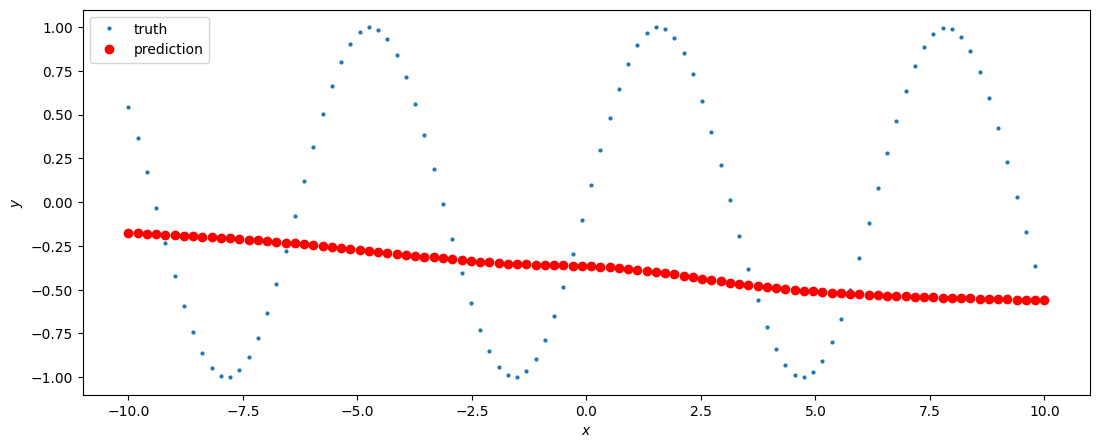

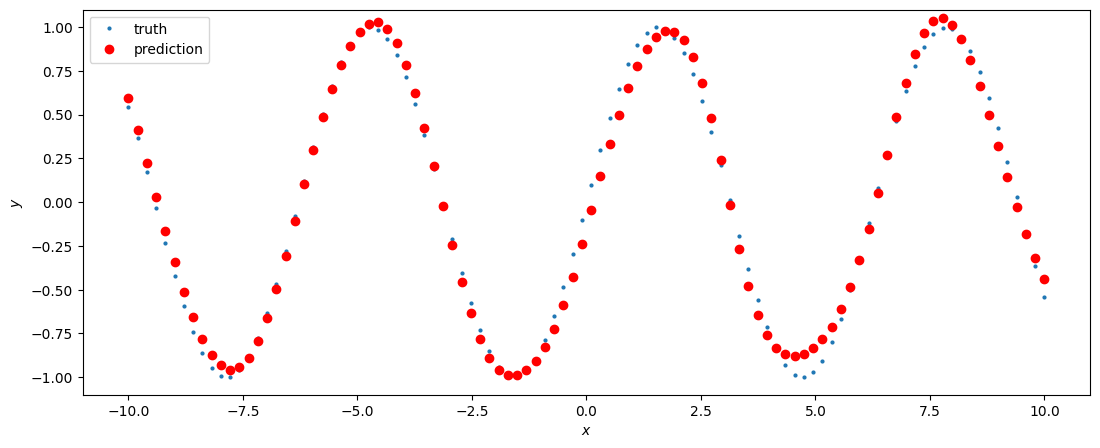

In [ ]:
class Net(q.nn.Module):  # родительский класс q.nn.Module
    def __init__(self, n_of_hidden_neurons):  # наследуем с передачей весов н.с. [w1 w2 ... wn]
        super(Net, self).__init__()  # + инициализация род. класса
        self.fullc_layer1 = q.nn.Linear(1, n_of_hidden_neurons)  # вход -> слой
        self.func_of_activation = q.nn.Sigmoid()
        self.fullc_layer_end = q.nn.Linear(n_of_hidden_neurons, 1)  # слой -> выход

    def forward(self, x):
        x = self.fullc_layer1(x)
        x = self.func_of_activation(x)
        x = self.fullc_layer_end(x)
        return x


def loss_F(prediction, target):  # предсказание / истинное значение
    f = (prediction - target) ** 2
    return f.mean()  # возвращаем ср. знач. лосс-функции


def predict(net, x, y):
    y_pr = net.forward(x)
    plt.plot(x.numpy(), y.numpy(), 'o', label='truth', markersize=2)
    plt.plot(x.numpy(), y_pr.data.numpy(), 'o', c='red', label='prediction')
    plt.axis([-11, 11, -1.1, 1.1])
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.show()


own_net = Net(30)  # задаем сеть, в каждом слое 50 нейронов
predict(own_net, x_validation, y_validation)  # предсказание с графиком до обучения

grad_stepper = q.optim.Adam(own_net.parameters(), lr=0.01)  # Net.parameters() ~ [w1 w2 ... wn]
# learning rate = 0.01  ~  шаг град. спуска


for epoch in range(2000):
    grad_stepper.zero_grad()

    y_pred1 = own_net.forward(x_train)  # считаем предсказания по тренеровочному датасету

    loss_value = loss_F(y_pred1, y_train)  # f(W0)=(...), W0=[prediction,truth]

    loss_value.backward()  # (...)'=f'(W0)

    grad_stepper.step()  # шаг градиентного спуска:  W1=W0-grad[f(W0)]*C ; смещение весов

predict(own_net, x_validation, y_validation) # предказание после обучения